In [1]:
import pandas as pd
from rank_msas import call_in_all_datasets, make_zillow_ranking
from helper_functions.msa_zip_cleaning import clean_BLS_msa_names
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce


2024-05-30 22:55:36.636 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-05-30 22:55:37.151 
  command:

    streamlit run /Users/WonderWolff/Real_Estate/projects_to_publish/msa_rank_dashboard/venv/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-05-30 22:55:37.152 No runtime found, using MemoryCacheStorageManager
2024-05-30 22:55:37.512 No runtime found, using MemoryCacheStorageManager


In [2]:
# Call in the datasets
jobs_smooth, zillow_rent, zillow_price, insurance, proptaxes = call_in_all_datasets()

zillow_rent

,msa_name,date,value,year
0,United States,2015-01-01,1226.9430,2015
1,United States,2015-02-01,1232.4815,2015
2,United States,2015-03-01,1238.2841,2015
3,United States,2015-04-01,1243.3033,2015
4,United States,2015-05-01,1247.6703,2015
...,...,...,...,...
35884,"Portales, NM",2024-01-01,758.6382,2024
35885,"Portales, NM",2024-02-01,764.8918,2024
35886,"Portales, NM",2024-03-01,763.0556,2024
35887,"Fairfield, IA",2024-02-01,695.2378,2024


In [3]:
# Rank rent growth for the past 1 Year
rent_1year = make_zillow_ranking(
    df_dict={
        "Rent": [zillow_rent[zillow_rent['date']>='2023-03-01'], 2023]
    },
    use_total_trend=False,
    use_average_percent=True,
    average_percent_weight_dict={
        "Rent": 1
    }
)

rent_1year

2024-05-30 22:55:39.359 No runtime found, using MemoryCacheStorageManager


,msa_name,trend_coef_Rent,average_value_Rent,pct_coef_Rent,average_pct_Rent,normalized_trend_coef_Rent,normalized_pct_coef_Rent,normalized_average_pct_Rent,Rent_weight,total_weight,avg_insurance,prop_tax,Jobs,Rent,Price,rent_price_ratio,rank
0,"Payson, AZ",2.1237,49.4066,0.0007,0.0378,1.0000,0.5194,1.0000,1.0000,1.0000,4086.0000,0.0066,NaN,1411.8056,384672.5622,0.0037,1
1,"Orangeburg, SC",0.8872,38.2344,-0.0003,0.0365,0.7563,0.1966,0.9844,0.9844,0.9844,4319.0000,0.0057,NaN,1131.6667,145209.9463,0.0078,2
2,"Cortland, NY",0.8106,27.3509,0.0001,0.0281,0.7411,0.3348,0.8797,0.8797,0.8797,3276.0000,0.0172,NaN,1170.0000,183148.3112,0.0064,3
3,"Mount Pleasant, MI",0.6867,23.3633,0.0001,0.0253,0.7167,0.3280,0.8452,0.8452,0.8452,3564.0000,0.0154,NaN,1097.2222,201121.8204,0.0055,4
4,"Bluefield, WV",0.6156,13.2214,0.0002,0.0241,0.7027,0.3506,0.8300,0.8300,0.8300,3271.0000,0.0058,NaN,635.8333,133345.3435,0.0048,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,"Klamath Falls, OR",-0.3991,-7.3437,-0.0000,-0.0051,0.5027,0.2691,0.4673,0.4673,0.4673,3016.0000,0.0097,NaN,1310.0000,283330.9418,0.0046,509
509,"Fergus Falls, MN",-0.2130,-6.3834,-0.0001,-0.0064,0.5394,0.2338,0.4509,0.4509,0.4509,4308.0000,0.0112,NaN,980.8333,322813.1932,0.0030,510
510,"Greeneville, TN",-0.4491,-8.5502,0.0000,-0.0080,0.4928,0.2954,0.4315,0.4315,0.4315,4873.0000,0.0071,NaN,1027.7778,234242.7599,0.0044,511
511,"Boone, NC",-2.9493,-44.3991,-0.0008,-0.0200,0.0000,0.0000,0.2823,0.2823,0.2823,4375.0000,0.0084,NaN,1995.2778,496828.8463,0.0040,512


In [4]:
# Rank rent growth for the past 5 Years
rent_5year = make_zillow_ranking(
    df_dict={
        "Rent": [zillow_rent[zillow_rent['date']>='2019-01-01'], 2019]
    },
    use_total_trend=False,
    use_average_percent=True,
    average_percent_weight_dict={
        "Rent": 1
    }
)

rent_5year

,msa_name,trend_coef_Rent,average_value_Rent,pct_coef_Rent,average_pct_Rent,normalized_trend_coef_Rent,normalized_pct_coef_Rent,normalized_average_pct_Rent,Rent_weight,total_weight,avg_insurance,prop_tax,Jobs,Rent,Price,rent_price_ratio,rank
0,"Glenwood Springs, CO",4.0084,99.9442,-0.0000,0.0106,1.0000,0.1535,1.0000,1.0000,1.0000,5542.0000,0.0051,NaN,13130.4108,914342.0431,0.0144,1
1,"Sebastian, FL",0.6335,16.7293,-0.0000,0.0100,0.1626,0.2228,0.9405,0.9405,0.9405,5854.0000,0.0089,59200.0000,2263.7619,380245.6376,0.0060,2
2,"Barnstable Town, MA",0.6157,19.9148,-0.0000,0.0098,0.1582,0.1591,0.9273,0.9273,0.9273,2746.0000,0.0123,107900.0000,2705.1349,723993.4072,0.0037,3
3,"Naples, FL",0.8470,19.1293,-0.0000,0.0087,0.2156,0.2255,0.8237,0.8237,0.8237,5854.0000,0.0089,174800.0000,2869.0161,618052.9861,0.0046,4
4,"Knoxville, TN",0.4527,11.6846,0.0000,0.0085,0.1178,0.3213,0.8051,0.8051,0.8051,4873.0000,0.0071,440700.0000,1777.6762,342592.3017,0.0052,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,"Lake Charles, LA",0.0661,1.5981,-0.0000,0.0018,0.0218,0.1815,0.1949,0.1949,0.1949,5277.0000,0.0055,97000.0000,1074.4429,187537.1674,0.0057,289
289,"San Jose, CA",0.1967,5.2757,0.0000,0.0017,0.0542,0.3818,0.1892,0.1892,0.1892,2598.0000,0.0076,1160100.0000,3277.1200,1633092.0638,0.0020,290
290,"San Francisco, CA",0.1286,3.6282,0.0000,0.0013,0.0373,0.3076,0.1501,0.1501,0.1501,2598.0000,0.0076,2471100.0000,3023.5909,1187716.3938,0.0025,291
291,"Odessa, TX",0.0157,0.3442,0.0000,0.0003,0.0093,0.9038,0.0634,0.0634,0.0634,5602.0000,0.0180,81700.0000,1470.0592,230093.5750,0.0064,292


In [5]:
# This function cleans the population files provided by the US Census
def clean_census_metromicro_pop_xls_file(
    year,
    metro=True,
    micro=False,
):
    if metro:
        keyword = 'metro'
        keyword_caps = 'Metro'
    elif micro:
        keyword = 'micro'
        keyword_caps = 'Micro'

    # Call in population estimates at metro level for 2023
    metro_pop = pd.read_excel(
        f'datasets/census_data/{keyword}area_pop_{year}.xlsx',
        header=3,
        usecols=[0, 5], # Only keep name of Metro and 2023 population data
        skipfooter=6,
        names=['msa_name',f'{year}_population']
    )

    # Clean up file strings
    metro_pop['msa_name'] = metro_pop['msa_name'].str.strip(".")

    # Replace / with -
    metro_pop['msa_name'] = metro_pop['msa_name'].str.replace("/", "-")

    # Drop blank rows
    metro_pop = metro_pop.dropna()

    # Get rid of metro division
    metro_pop = metro_pop[~metro_pop['msa_name'].str.contains("Metro Division")]

    # Only keep rows explicitly belonging to metros
    metro_pop = metro_pop[
        metro_pop['msa_name'].str.contains(f"{keyword_caps} Area")].reset_index(drop=True)

    # Drop "Metro Area" from name
    metro_pop['msa_name'] = metro_pop['msa_name'].apply(lambda x: x.replace(
        f" {keyword_caps} Area",""))

    # Now clean the names using our BLS clean name function
    metro_pop = clean_BLS_msa_names(metro_pop).drop(columns=['state', 'city'])

    # Save to csv
    metro_pop.to_csv(
        f'datasets/census_data/{keyword}area_pop_{year}.csv',
        index=False
    )

    return metro_pop

metro_pop = clean_census_metromicro_pop_xls_file(year=2023)
micro_pop = clean_census_metromicro_pop_xls_file(
    year=2023, metro=False, micro=True)

metro_micro_pop = pd.concat([metro_pop, micro_pop], ignore_index=True)



In [6]:
# Join metro population numbers with ranking.
# This will remove any metros with a population less
# than 10,000 people, such as Glenwood Springs, CO.
# I am okay with this tradeoff.
rent_1year_pop = rent_1year.merge(metro_pop, how='inner', on='msa_name')
rent_5year_pop = rent_5year.merge(metro_pop, how='inner', on='msa_name')


In [7]:
rent_5year_pop.head(10)

,msa_name,trend_coef_Rent,average_value_Rent,pct_coef_Rent,average_pct_Rent,normalized_trend_coef_Rent,normalized_pct_coef_Rent,normalized_average_pct_Rent,Rent_weight,total_weight,avg_insurance,prop_tax,Jobs,Rent,Price,rent_price_ratio,rank,2023_population
0,"Sebastian, FL",0.6335,16.7293,-0.0000,0.0100,0.1626,0.2228,0.9405,0.9405,0.9405,5854.0000,0.0089,59200.0000,2263.7619,380245.6376,0.0060,2,169795.0000
1,"Barnstable Town, MA",0.6157,19.9148,-0.0000,0.0098,0.1582,0.1591,0.9273,0.9273,0.9273,2746.0000,0.0123,107900.0000,2705.1349,723993.4072,0.0037,3,231735.0000
2,"Naples, FL",0.8470,19.1293,-0.0000,0.0087,0.2156,0.2255,0.8237,0.8237,0.8237,5854.0000,0.0089,174800.0000,2869.0161,618052.9861,0.0046,4,404310.0000
3,"Knoxville, TN",0.4527,11.6846,0.0000,0.0085,0.1178,0.3213,0.8051,0.8051,0.8051,4873.0000,0.0071,440700.0000,1777.6762,342592.3017,0.0052,5,946264.0000
4,"Atlantic City, NJ",0.4882,13.5067,0.0000,0.0085,0.1266,0.4207,0.8008,0.8008,0.8008,2619.0000,0.0249,131200.0000,2069.6490,351497.2278,0.0059,6,369823.0000
5,"Punta Gorda, FL",0.6219,14.4834,-0.0000,0.0084,0.1597,0.1600,0.7979,0.7979,0.7979,5854.0000,0.0089,56400.0000,2233.7105,357076.6366,0.0063,7,206134.0000
6,"Binghamton, NY",0.2645,7.4816,0.0000,0.0081,0.0711,0.2865,0.7732,0.7732,0.7732,3276.0000,0.0172,100600.0000,1180.6902,173617.6889,0.0068,9,243792.0000
7,"Blacksburg, VA",0.3312,11.2226,-0.0000,0.0079,0.0876,0.1522,0.7490,0.7490,0.7490,3430.0000,0.0082,86300.0000,1814.4664,268594.9203,0.0068,11,181428.0000
8,"Missoula, MT",0.3423,8.7611,-0.0000,0.0079,0.0903,0.1408,0.7487,0.7487,0.7487,4271.0000,0.0084,68000.0000,1418.9798,561296.1222,0.0025,12,126939.0000
9,"Cape Coral, FL",0.6263,13.5097,-0.0000,0.0079,0.1608,0.1490,0.7486,0.7486,0.7486,5854.0000,0.0089,309900.0000,2183.7059,399339.0742,0.0055,13,834573.0000


In [8]:
# Create filter for the merged datasets
def filter_rankings(
    ranking_df,
    min_population=50000,
    pop_col_name='2023_population'
):
    """
    The default min_population is set to 50,000 because
    that is the minimum population that an area needs
    in order for the U.S. Census to categorize it as
    a Metropolitan Statistical Area.
    """
    df = ranking_df.copy()
    df = df[df[pop_col_name]>=50_000]
    
    return df

rent_1 = filter_rankings(rent_1year_pop)
rent_5 = filter_rankings(rent_5year_pop)


In [9]:
rent_5.head(10)

,msa_name,trend_coef_Rent,average_value_Rent,pct_coef_Rent,average_pct_Rent,normalized_trend_coef_Rent,normalized_pct_coef_Rent,normalized_average_pct_Rent,Rent_weight,total_weight,avg_insurance,prop_tax,Jobs,Rent,Price,rent_price_ratio,rank,2023_population
0,"Sebastian, FL",0.6335,16.7293,-0.0000,0.0100,0.1626,0.2228,0.9405,0.9405,0.9405,5854.0000,0.0089,59200.0000,2263.7619,380245.6376,0.0060,2,169795.0000
1,"Barnstable Town, MA",0.6157,19.9148,-0.0000,0.0098,0.1582,0.1591,0.9273,0.9273,0.9273,2746.0000,0.0123,107900.0000,2705.1349,723993.4072,0.0037,3,231735.0000
2,"Naples, FL",0.8470,19.1293,-0.0000,0.0087,0.2156,0.2255,0.8237,0.8237,0.8237,5854.0000,0.0089,174800.0000,2869.0161,618052.9861,0.0046,4,404310.0000
3,"Knoxville, TN",0.4527,11.6846,0.0000,0.0085,0.1178,0.3213,0.8051,0.8051,0.8051,4873.0000,0.0071,440700.0000,1777.6762,342592.3017,0.0052,5,946264.0000
4,"Atlantic City, NJ",0.4882,13.5067,0.0000,0.0085,0.1266,0.4207,0.8008,0.8008,0.8008,2619.0000,0.0249,131200.0000,2069.6490,351497.2278,0.0059,6,369823.0000
5,"Punta Gorda, FL",0.6219,14.4834,-0.0000,0.0084,0.1597,0.1600,0.7979,0.7979,0.7979,5854.0000,0.0089,56400.0000,2233.7105,357076.6366,0.0063,7,206134.0000
6,"Binghamton, NY",0.2645,7.4816,0.0000,0.0081,0.0711,0.2865,0.7732,0.7732,0.7732,3276.0000,0.0172,100600.0000,1180.6902,173617.6889,0.0068,9,243792.0000
7,"Blacksburg, VA",0.3312,11.2226,-0.0000,0.0079,0.0876,0.1522,0.7490,0.7490,0.7490,3430.0000,0.0082,86300.0000,1814.4664,268594.9203,0.0068,11,181428.0000
8,"Missoula, MT",0.3423,8.7611,-0.0000,0.0079,0.0903,0.1408,0.7487,0.7487,0.7487,4271.0000,0.0084,68000.0000,1418.9798,561296.1222,0.0025,12,126939.0000
9,"Cape Coral, FL",0.6263,13.5097,-0.0000,0.0079,0.1608,0.1490,0.7486,0.7486,0.7486,5854.0000,0.0089,309900.0000,2183.7059,399339.0742,0.0055,13,834573.0000


In [10]:
# This functions prepares the dataset to be
# displayed on a blog like BiggerPockets.
def prep_for_display(
    dataframe,
    years_long
):
    df = dataframe.copy().head(10)
    df['average_pct_Rent'] = df['average_pct_Rent'] * 100
    df.rename(columns={
        'average_pct_Rent': 'Average % Monthly Rent Growth',
        'msa_name': 'MSA',
        'Rent': 'ZORI Rent',
        'Price': 'ZHVI Price',
        '2023_population': '2023 Population'
    }, 
        inplace=True)
    
    df['Average % Monthly Rent Growth'] = df['Average % Monthly Rent Growth'].astype(str)
    df['Average % Monthly Rent Growth'] = df['Average % Monthly Rent Growth'].apply(
        lambda x: x[:4] + "%"
    )
    df['ZORI Rent'] = df['ZORI Rent'].apply(
        lambda x: "$" + '{:,}'.format(int(x))
    )
    df['ZHVI Price'] = df['ZHVI Price'].apply(
        lambda x: "$" + '{:,}'.format(int(x))
    )
    df['2023 Population'] = df['2023 Population'].apply(
        lambda x: '{:,}'.format(int(x))
    )
    df = df[['MSA','Average % Monthly Rent Growth','ZORI Rent',
             'ZHVI Price',
             '2023 Population']]
    df.head(10).to_csv(
        f'datasets/for_publishing/{years_long}_year_rent_growth.csv',
        index=False
    )
    
    return df

rent_1_display = prep_for_display(rent_1, years_long=1)

rent_1_display.head(10)


,MSA,Average % Monthly Rent Growth,ZORI Rent,ZHVI Price,2023 Population
0,"Dalton, GA",2.37%,"$1,508","$233,449","144,722"
1,"Kahului, HI",1.58%,"$4,344","$1,060,090","164,264"
2,"El Centro, CA",1.58%,"$1,655","$340,415","179,057"
3,"Springfield, OH",1.17%,"$1,057","$183,112","134,610"
4,"Elizabethtown, KY",1.13%,"$1,391","$224,083","127,576"
5,"Atlantic City, NJ",1.11%,"$2,069","$351,497","369,823"
6,"Traverse City, MI",1.07%,"$2,053","$390,535","156,371"
7,"Michigan City, IN",1.06%,"$1,133","$231,490","111,706"
8,"Kokomo, IN",1.04%,$869,"$169,040","83,831"
9,"Peoria, IL",1.02%,"$1,136","$147,796","362,240"


In [11]:
rent_5_display = prep_for_display(rent_5, years_long=5)

rent_5_display.head(10)

,MSA,Average % Monthly Rent Growth,ZORI Rent,ZHVI Price,2023 Population
0,"Sebastian, FL",0.99%,"$2,263","$380,245","169,795"
1,"Barnstable Town, MA",0.98%,"$2,705","$723,993","231,735"
2,"Naples, FL",0.87%,"$2,869","$618,052","404,310"
3,"Knoxville, TN",0.85%,"$1,777","$342,592","946,264"
4,"Atlantic City, NJ",0.84%,"$2,069","$351,497","369,823"
5,"Punta Gorda, FL",0.84%,"$2,233","$357,076","206,134"
6,"Binghamton, NY",0.81%,"$1,180","$173,617","243,792"
7,"Blacksburg, VA",0.78%,"$1,814","$268,594","181,428"
8,"Missoula, MT",0.78%,"$1,418","$561,296","126,939"
9,"Cape Coral, FL",0.78%,"$2,183","$399,339","834,573"


In [12]:
# Get one dataframe with all 10
def get_msas_to_plot(
    dataframe
):
    
    rent_df_list = []
    for msa in dataframe.head(10)['msa_name']:
        temp_df = zillow_rent[
            zillow_rent['msa_name']==msa].copy()
        temp_df.rename(columns={'value':f'{msa} Rent'}, inplace=True)

        # Sort by date
        temp_df = temp_df.sort_values('date')

        # Drop unnecessary columns
        temp_df.drop(columns=['msa_name','year'], inplace=True)

        rent_df_list.append(temp_df)

    msas_to_plot_rent = reduce(
        lambda x, y: pd.merge(x, y, on='date'), rent_df_list)

    return msas_to_plot_rent

msas_to_plot_rent = get_msas_to_plot(rent_5)
msas_to_plot_rent

,date,"Sebastian, FL Rent","Barnstable Town, MA Rent","Naples, FL Rent","Knoxville, TN Rent","Atlantic City, NJ Rent","Punta Gorda, FL Rent","Binghamton, NY Rent","Blacksburg, VA Rent","Missoula, MT Rent","Cape Coral, FL Rent"
0,2019-03-01,1251.9021,1530.1606,1704.5254,1058.0899,1231.2547,1355.3651,721.3727,1187.1530,880.5294,1353.1797
1,2019-04-01,1265.5146,1542.1619,1705.7950,1064.2099,1231.0282,1358.8542,744.9115,1203.1260,884.7934,1359.3017
2,2019-05-01,1270.3835,1538.0548,1701.9195,1070.8432,1243.3305,1360.3950,751.4322,1227.6780,893.7747,1366.6529
3,2019-06-01,1274.4397,1526.9966,1701.8491,1071.9460,1248.1584,1371.7401,754.7961,1230.7906,898.5816,1374.3924
4,2019-07-01,1272.6183,1585.8980,1713.2865,1073.7348,1254.9347,1380.3228,745.4365,1232.0212,902.4443,1377.5755
5,2019-08-01,1294.6479,1628.1903,1730.9060,1078.9470,1257.3329,1390.8637,747.0470,1234.3409,904.4419,1377.7777
6,2019-09-01,1294.2649,1649.3638,1750.4505,1083.8524,1252.0202,1388.9594,748.2678,1237.1165,910.6302,1381.8056
7,2019-10-01,1312.2464,1682.3320,1761.6499,1092.5941,1253.5742,1398.4996,758.9557,1256.3261,915.5044,1384.1931
8,2019-11-01,1308.6625,1675.3570,1767.1591,1095.5966,1250.6830,1404.8829,763.5175,1277.7545,921.1994,1395.0828
9,2019-12-01,1320.0761,1759.1767,1769.0599,1102.7011,1262.2757,1422.5045,774.6452,1299.4306,922.0107,1398.4195


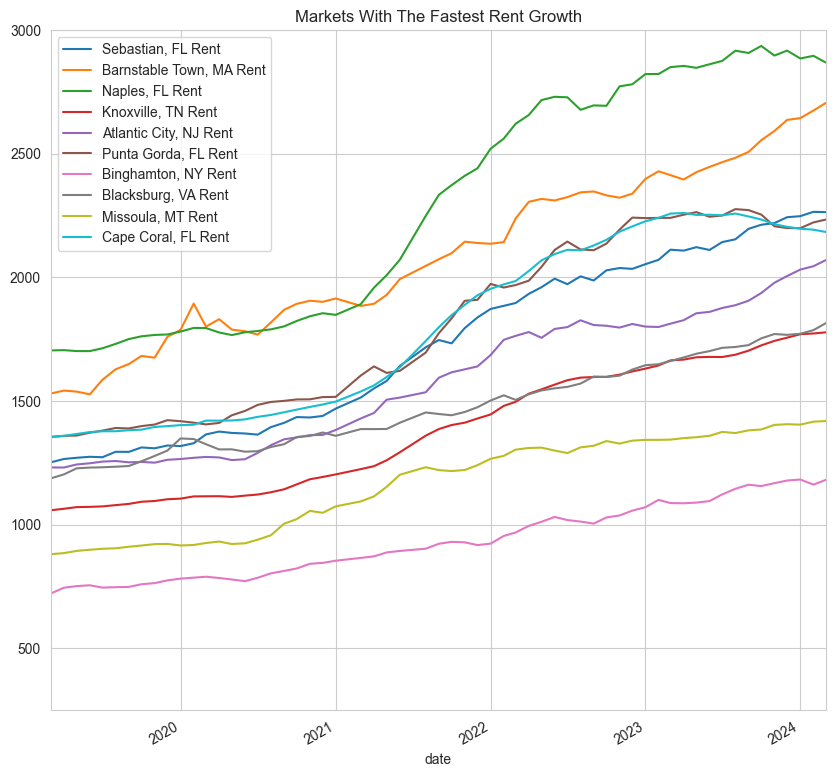

In [13]:
%matplotlib inline

# Create simple plot
sns.set_style("whitegrid")
fig = msas_to_plot_rent.plot(x='date', figsize=(10,10))
fig.set_ylim([250, 3000])
fig.set_xlim(['2019-03-01', '2024-03-01'])
fig.set_title("Markets With The Fastest Rent Growth")
plt.show()


In [14]:
# Prep our price filter for display
prep_for_display(
    rent_5[rent_5['Price']<=450_000].head(10), 
    years_long='5_price')

,MSA,Average % Monthly Rent Growth,ZORI Rent,ZHVI Price,2023 Population
0,"Sebastian, FL",0.99%,"$2,263","$380,245","169,795"
3,"Knoxville, TN",0.85%,"$1,777","$342,592","946,264"
4,"Atlantic City, NJ",0.84%,"$2,069","$351,497","369,823"
5,"Punta Gorda, FL",0.84%,"$2,233","$357,076","206,134"
6,"Binghamton, NY",0.81%,"$1,180","$173,617","243,792"
7,"Blacksburg, VA",0.78%,"$1,814","$268,594","181,428"
9,"Cape Coral, FL",0.78%,"$2,183","$399,339","834,573"
10,"Port St. Lucie, FL",0.77%,"$2,400","$402,978","536,901"
11,"Sebring, FL",0.77%,"$1,524","$245,971","107,614"
13,"Johnson City, TN",0.76%,"$1,241","$260,352","213,198"


In [15]:
less_than_450k_price_more_than_250k_pop = rent_5[
    (rent_5['2023_population']>=250_000)
    & (rent_5['Price']<=450_000)]

prep_for_display(less_than_450k_price_more_than_250k_pop.head(10), 
    years_long='5_pop_250k')

,MSA,Average % Monthly Rent Growth,ZORI Rent,ZHVI Price,2023 Population
3,"Knoxville, TN",0.85%,"$1,777","$342,592","946,264"
4,"Atlantic City, NJ",0.84%,"$2,069","$351,497","369,823"
9,"Cape Coral, FL",0.78%,"$2,183","$399,339","834,573"
10,"Port St. Lucie, FL",0.77%,"$2,400","$402,978","536,901"
17,"Tampa, FL",0.75%,"$2,099","$381,935","3,342,963"
21,"Hickory, NC",0.74%,"$1,489","$252,174","370,030"
22,"South Bend, IN",0.73%,"$1,342","$218,252","324,490"
23,"Savannah, GA",0.73%,"$1,802","$337,555","424,935"
29,"Bakersfield, CA",0.72%,"$1,754","$351,384","913,820"
32,"Pensacola, FL",0.71%,"$1,738","$308,550","530,090"


In [16]:
# Get the new, filtered dataframe to plot
msas_to_plot_rent_250k = get_msas_to_plot(
    less_than_450k_price_more_than_250k_pop)

msas_to_plot_rent_250k


,date,"Knoxville, TN Rent","Atlantic City, NJ Rent","Cape Coral, FL Rent","Port St. Lucie, FL Rent","Tampa, FL Rent","Hickory, NC Rent","South Bend, IN Rent","Savannah, GA Rent","Bakersfield, CA Rent","Pensacola, FL Rent"
0,2019-01-01,1053.2317,1232.2307,1346.1064,1491.3524,1333.5926,945.9621,851.7925,1144.3665,1137.0205,1116.5182
1,2019-02-01,1051.5972,1229.6624,1348.9223,1494.7225,1337.3126,957.6951,852.7081,1143.9912,1143.0480,1121.6562
2,2019-03-01,1058.0899,1231.2547,1353.1797,1498.2993,1341.8508,971.7179,856.4426,1149.5258,1151.9658,1130.9684
3,2019-04-01,1064.2099,1231.0282,1359.3017,1502.9181,1346.7754,998.3819,862.4714,1151.9825,1159.2647,1139.0634
4,2019-05-01,1070.8432,1243.3305,1366.6529,1503.6329,1351.3327,1005.5425,864.8310,1161.4888,1164.3348,1144.3325
5,2019-06-01,1071.9460,1248.1584,1374.3924,1508.8560,1356.6647,1007.8420,869.3951,1162.6701,1168.1318,1148.4937
6,2019-07-01,1073.7348,1254.9347,1377.5755,1511.7817,1362.2006,999.1763,873.6745,1164.7879,1172.7783,1151.2089
7,2019-08-01,1078.9470,1257.3329,1377.7777,1518.5428,1368.7289,1000.8130,874.1639,1165.5037,1178.0647,1155.2380
8,2019-09-01,1083.8524,1252.0202,1381.8056,1526.9838,1376.0336,995.8423,874.7067,1172.8835,1180.2228,1162.1970
9,2019-10-01,1092.5941,1253.5742,1384.1931,1540.0678,1382.2488,996.3463,874.7172,1178.9568,1185.5529,1170.8412


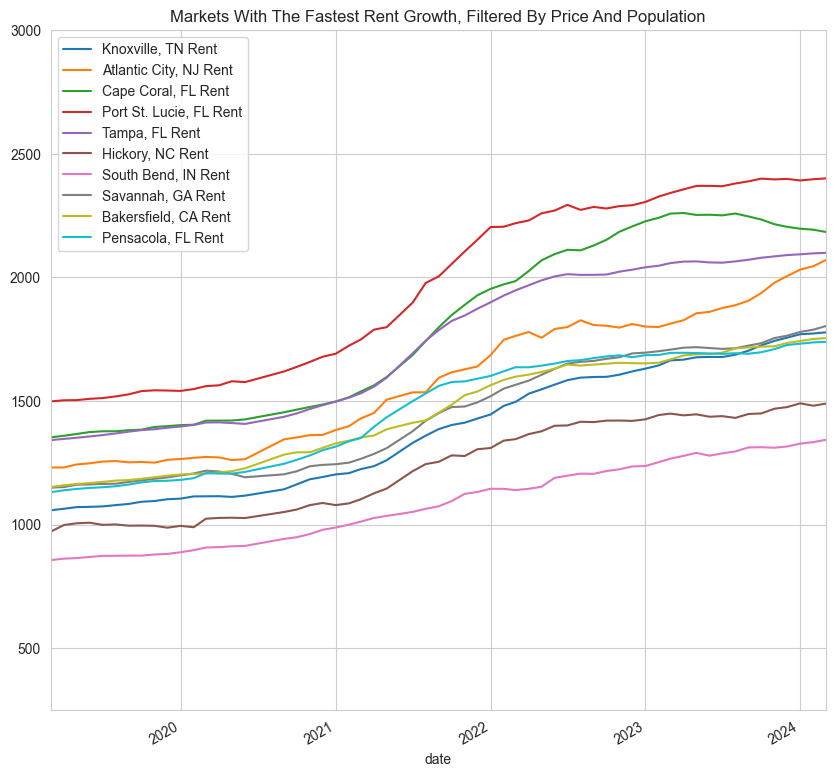

In [17]:
%matplotlib inline
# Create simple plot
sns.set_style("whitegrid")
fig = msas_to_plot_rent_250k.plot(x='date', figsize=(10,10))
fig.set_ylim([250, 3000])
fig.set_xlim(['2019-03-01', '2024-03-01'])
fig.set_title("Markets With The Fastest Rent Growth, Filtered By Price And Population")
plt.show()
